In [114]:
def genOut(grazesim=Grazing4):
    x = list(Grazing4.simulation[1].coralNodeCount.keys())

    multsimCoralCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].coralNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].coralNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    C = multsimCoralCounts
    N = multsimNeighborCounts
    CN = np.divide(N, C, out=np.zeros_like(N), where=C!=0)
    CNr = np.divide(CN, C, out=np.zeros_like(N), where=C!=0)

    multsimMacroCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].macroNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].macroNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()
    M = multsimMacroCounts
    mN = multsimNeighborCounts
    MN = np.divide(mN, M, out=np.zeros_like(mN), where=M!=0)
    MNr = np.divide(MN, M, out=np.zeros_like(mN), where=M!=0)


    multsimTurfCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].turfNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].turfNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()
    T = multsimTurfCounts
    tN = multsimNeighborCounts
    TN = np.divide(tN, T, out=np.zeros_like(tN), where=T!=0)
    TNr = np.divide(TN, T, out=np.zeros_like(tN), where=T!=0)
    
    return(C,CN,CNr,T,TN,TNr,M,MN,MNr)


def CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)

    plt.title("Subset Coral Count")
    plt.plot(x[ti:tf],C[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],C[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(322)

    plt.title("Subset Coral-Coral Neighbor Average")
    plt.plot(x[ti:tf],CN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],CN[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(323)

    plt.title("Subset Turf Count")
    plt.plot(x[ti:tf],T[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],T[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(324)

    plt.title("Subset Turf-Turf Neighbor Average")
    plt.plot(x[ti:tf],TN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],TN[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(325)

    plt.title("Subset Macroalgae Count")
    plt.plot(x[ti:tf],M[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],M[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(326)

    plt.title("Subset Macroalgae-Macroalgae Neighbor Average")
    plt.plot(x[ti:tf],MN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],MN[ti:tf,:].mean(axis=1), 'black')
    
def RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s):

    plt.figure(figsize=(20, 15))

    plt.subplot(321)

    plt.title("Subset Coral Count")
    plt.plot(x[ti:tf],C[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],C[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(322)

    plt.title("Subset CNr index")
    plt.plot(x[ti:tf],CNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],CNr[ti:tf,:].mean(axis=1), 'black')


    plt.subplot(323)

    plt.title("Subset Turf Count")
    plt.plot(x[ti:tf],T[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],T[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(324)

    plt.title("Subset TNr")
    plt.plot(x[ti:tf],TNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],TNr[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(325)

    plt.title("Subset Macroalgae Count")
    plt.plot(x[ti:tf],M[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],M[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(326)

    plt.title("Subset MNr")
    plt.plot(x[ti:tf],MNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],MNr[ti:tf,:].mean(axis=1), 'black')

In [1]:
from coralModelTrackingAlgae import Ocean, Reef, Organism
import tools as tl
import numpy as np


import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import ndimage



In [2]:
## Time and Grid Settings
NumberOfSimulations = 200
tf, dt= 400, .1 
NumberOfTimesteps = int(tf/dt)

rows, columns = 10, 10
NumberOfNodes = rows * columns
center = (round(rows/2),round(columns/2))

In [4]:
## Intial Grid Configuration
distanceGrid = np.array([Reef.distance([i+.5,j+.5], center) 
                 for i in range(0,rows) 
                 for j in range(0,columns)]).reshape(rows,columns)
maxCoralDist = np.concatenate(distanceGrid, axis=None)    # make into list of distance to center, next sort
maxCoralDist = np.sort(maxCoralDist)[int(coralPercent*100)]  ## <---- 33 here indicates the distance within with the 33 closest points are
coralNodeLocations = (np.where(distanceGrid < maxCoralDist))
coralNodeLocations = [(coralNodeLocations[0][n],coralNodeLocations[1][n]) 
                      for n in range(0,len(coralNodeLocations[0]))]

<center> <h1> GRAZING = .4 </h1> </center>

In [5]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.4
types4 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [6]:
%%time
Grazing4 = Ocean()

for s in range(0,NumberOfSimulations):
    medlowGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medlowGrazing.append(node)
            count = count + 1            
    medlowGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medlowGrazing.nodes):
            types4[n,i,s] = medlowGrazing.nodes[i].type
        medlowGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing4.append(medlowGrazing)

CPU times: user 9min 51s, sys: 2.59 s, total: 9min 54s
Wall time: 9min 57s


In [54]:
x = list(Grazing4.simulation[1].coralNodeCount.keys())
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing4
s=np.random.randint(low=0, high=200, size=(15,))

In [88]:
ti, tf = 0, 2000

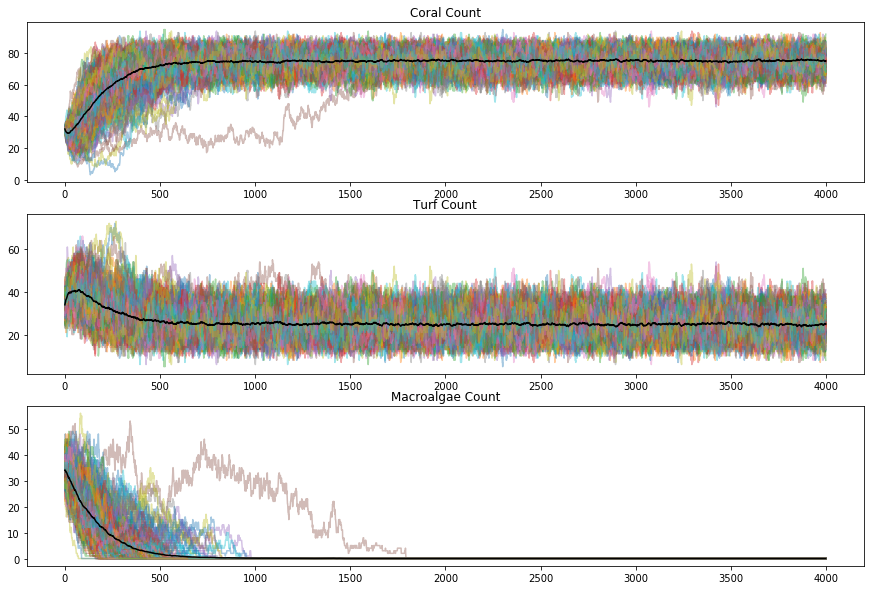

In [91]:
plt.figure(figsize=(15, 10))

plt.title("Output")

plt.subplot(311)

plt.title("Coral Count")
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')

plt.subplot(312)

plt.title("Turf Count")
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')

plt.subplot(313)

plt.title("Macroalgae Count")
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')


<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

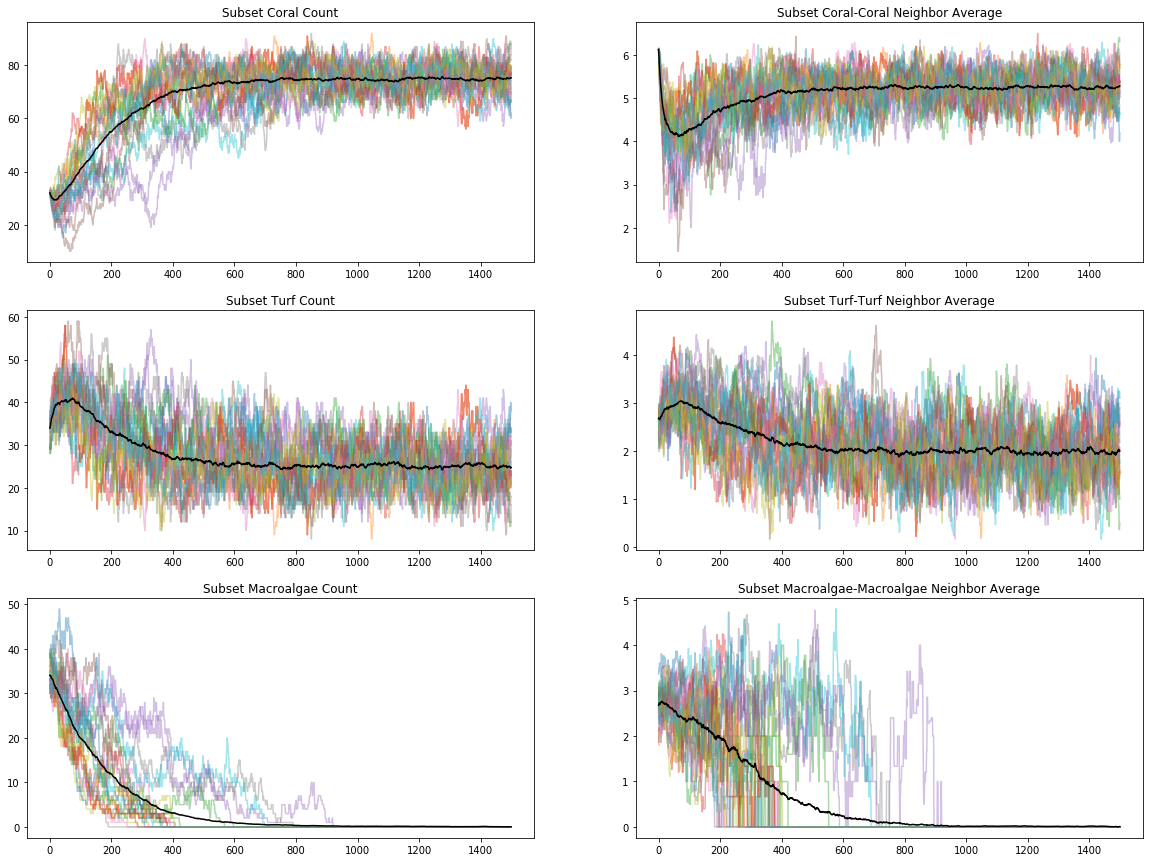

In [115]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

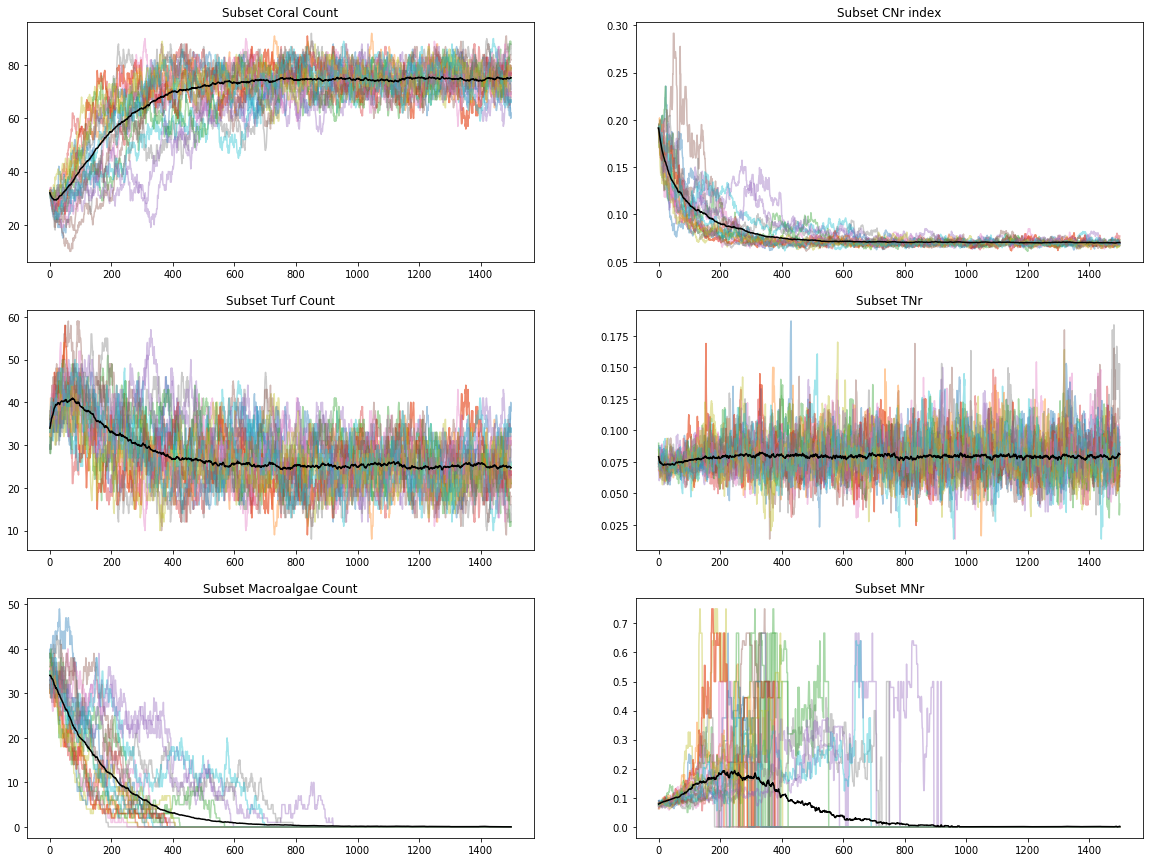

In [116]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .5 </h1> </center>

In [8]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.5
types5 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [9]:
%%time

Grazing5 = Ocean()

for s in range(0,NumberOfSimulations):
    medGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medGrazing.append(node)
            count = count + 1            
    medGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medGrazing.nodes):
            types5[n,i,s] = medGrazing.nodes[i].type
        medGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing5.append(medGrazing)

CPU times: user 10min 1s, sys: 2.33 s, total: 10min 3s
Wall time: 10min 6s


In [120]:
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing5)

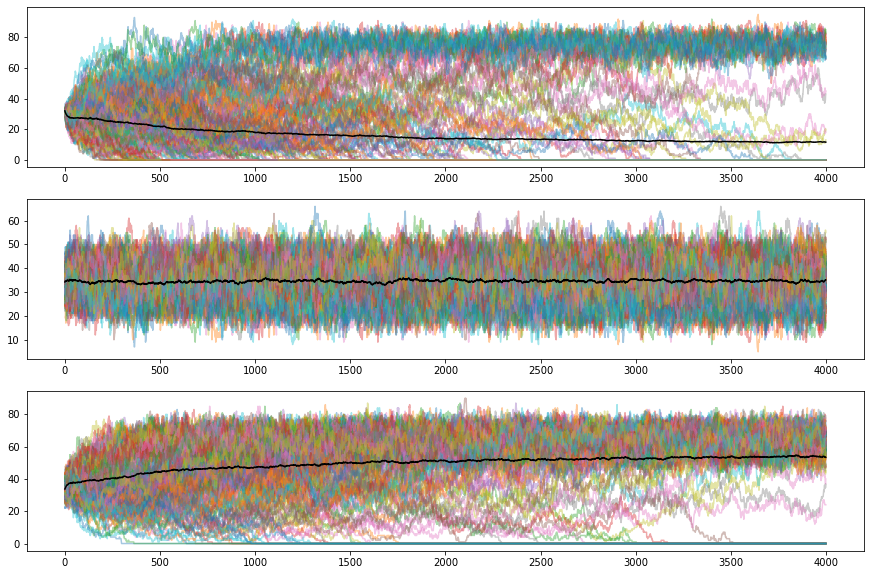

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

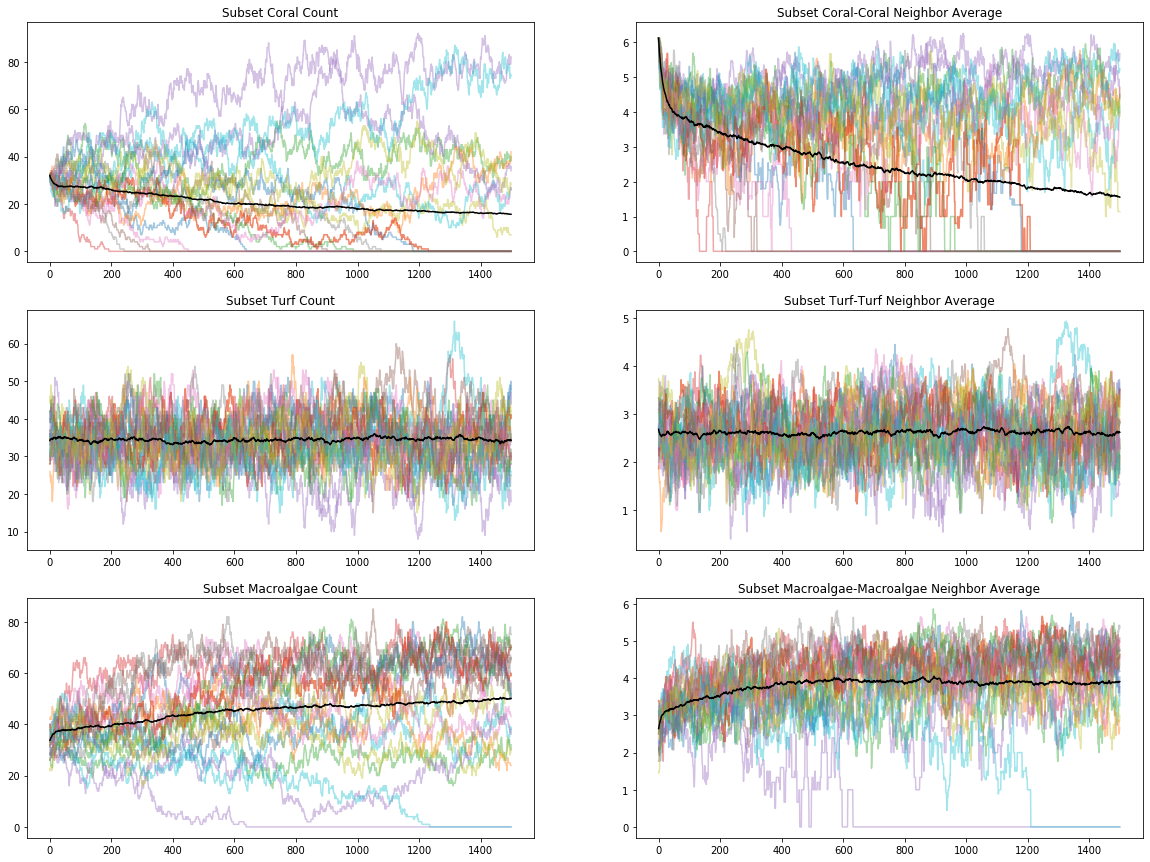

In [121]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

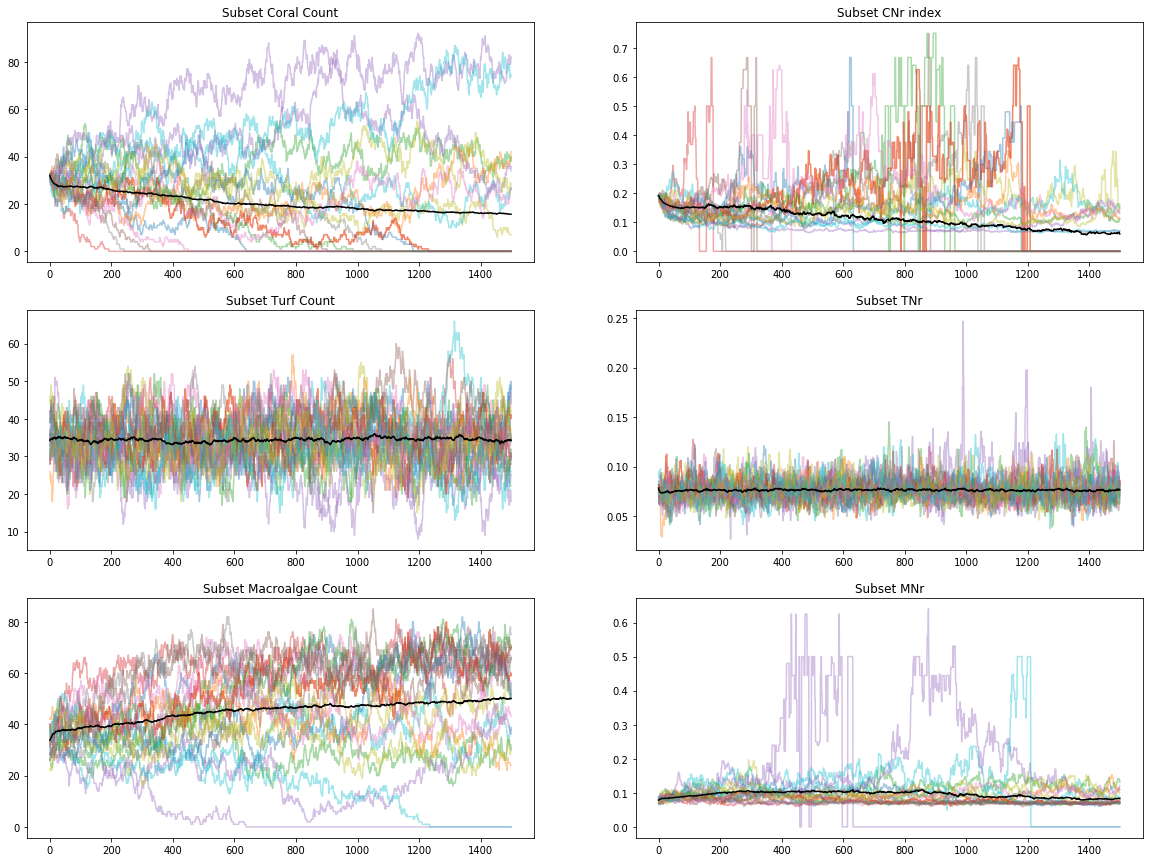

In [122]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .6 </h1> </center>

In [11]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.6
types6 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [12]:
%%time

Grazing6 = Ocean()

for s in range(0,NumberOfSimulations):
    medHighGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medHighGrazing.append(node)
            count = count + 1            
    medHighGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medHighGrazing.nodes):
            types6[n,i,s] = medHighGrazing.nodes[i].type
        medHighGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing6.append(medHighGrazing)

CPU times: user 10min 9s, sys: 1.98 s, total: 10min 11s
Wall time: 10min 13s


In [123]:
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing6)

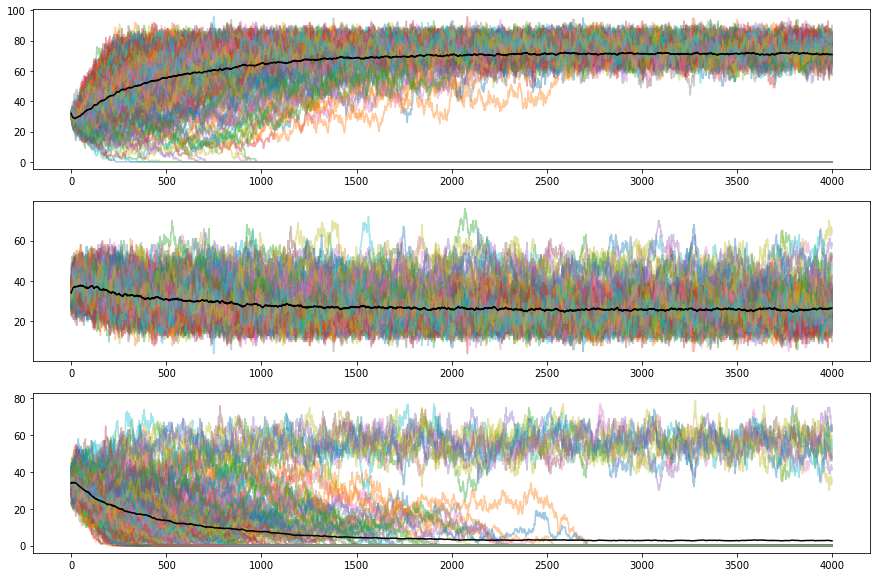

In [48]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

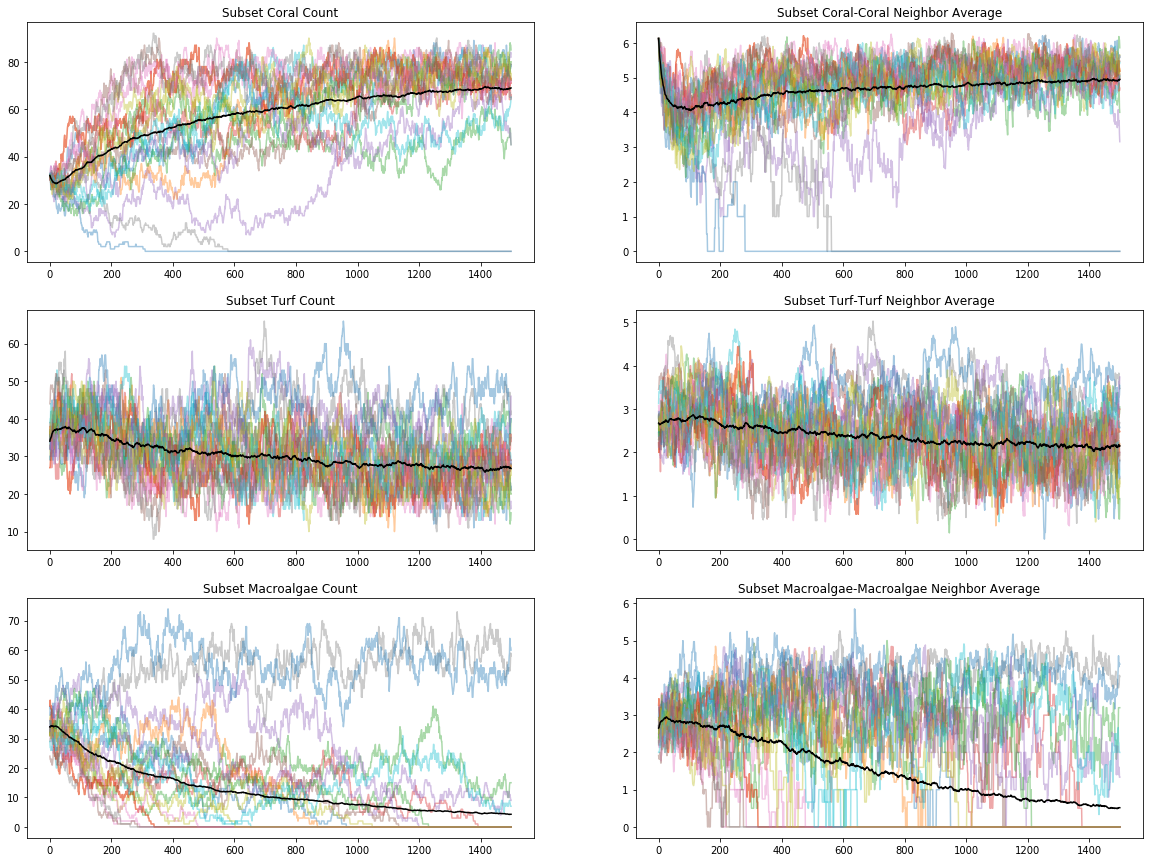

In [125]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

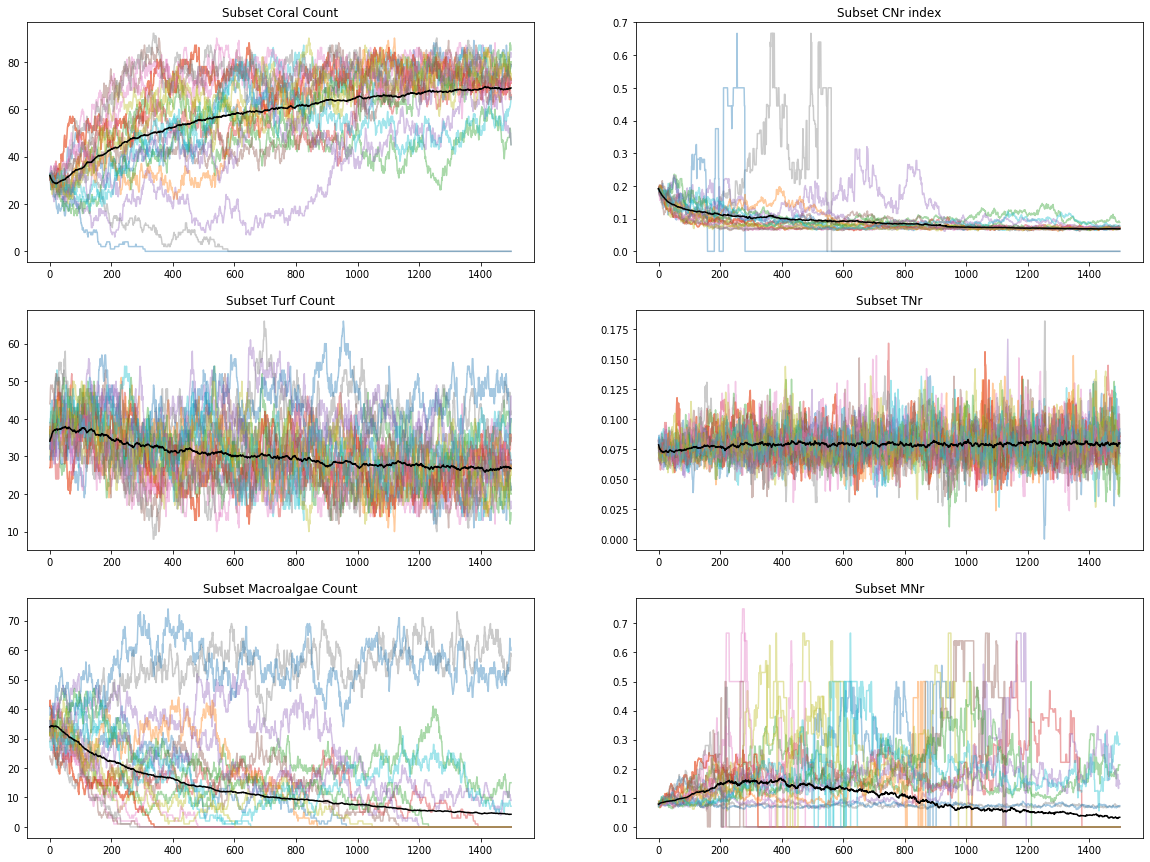

In [126]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .7 </h1> </center>

In [14]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.7
types7 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [15]:
%%time

Grazing7 = Ocean()

for s in range(0,NumberOfSimulations):
    HighGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            HighGrazing.append(node)
            count = count + 1            
    HighGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(HighGrazing.nodes):
            types7[n,i,s] = HighGrazing.nodes[i].type
        HighGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing7.append(HighGrazing)

CPU times: user 10min 13s, sys: 2.3 s, total: 10min 15s
Wall time: 10min 17s


In [127]:
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing7)

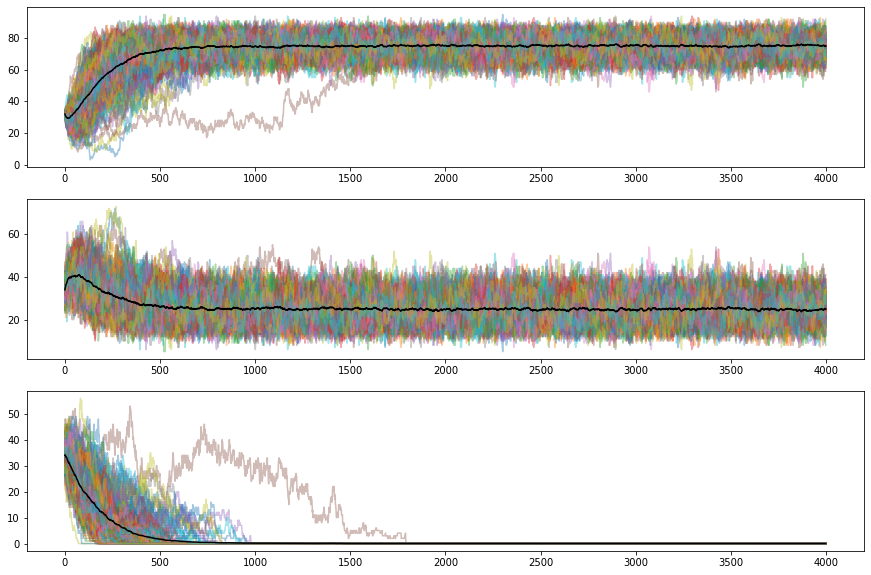

In [61]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

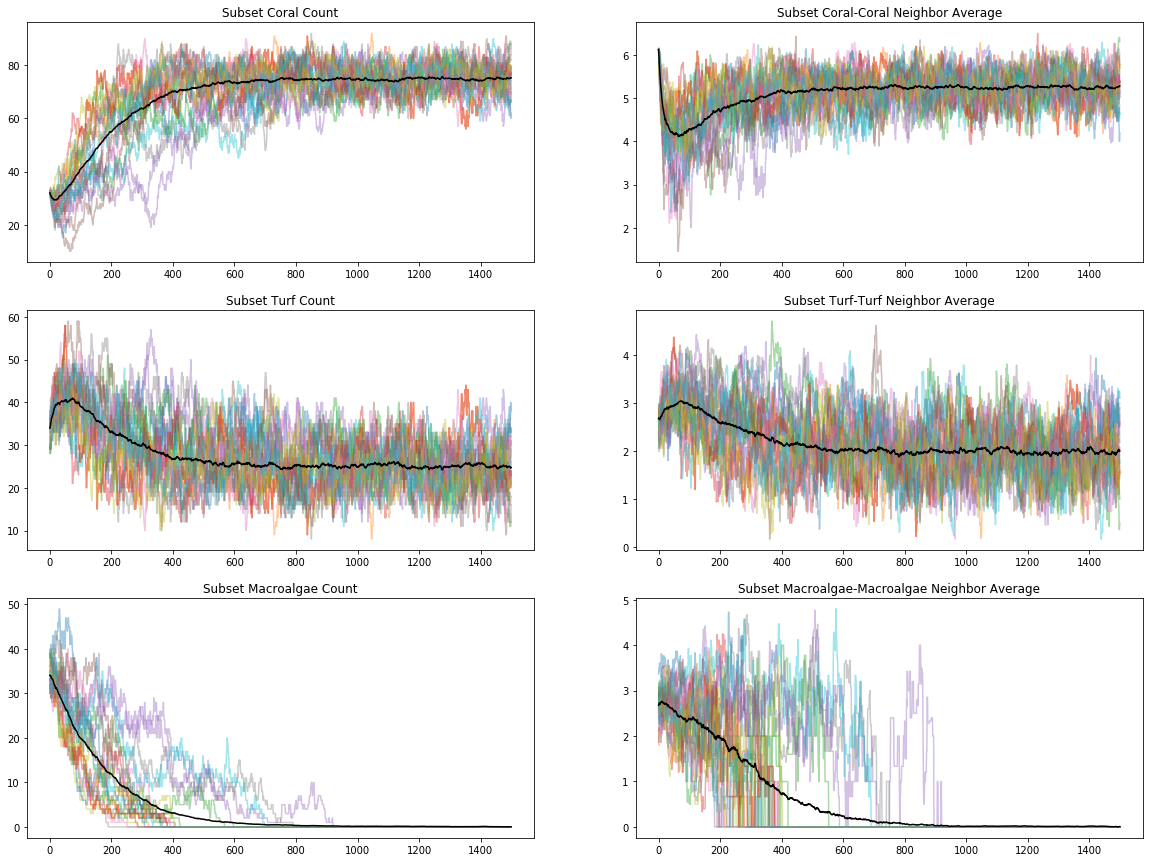

In [128]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

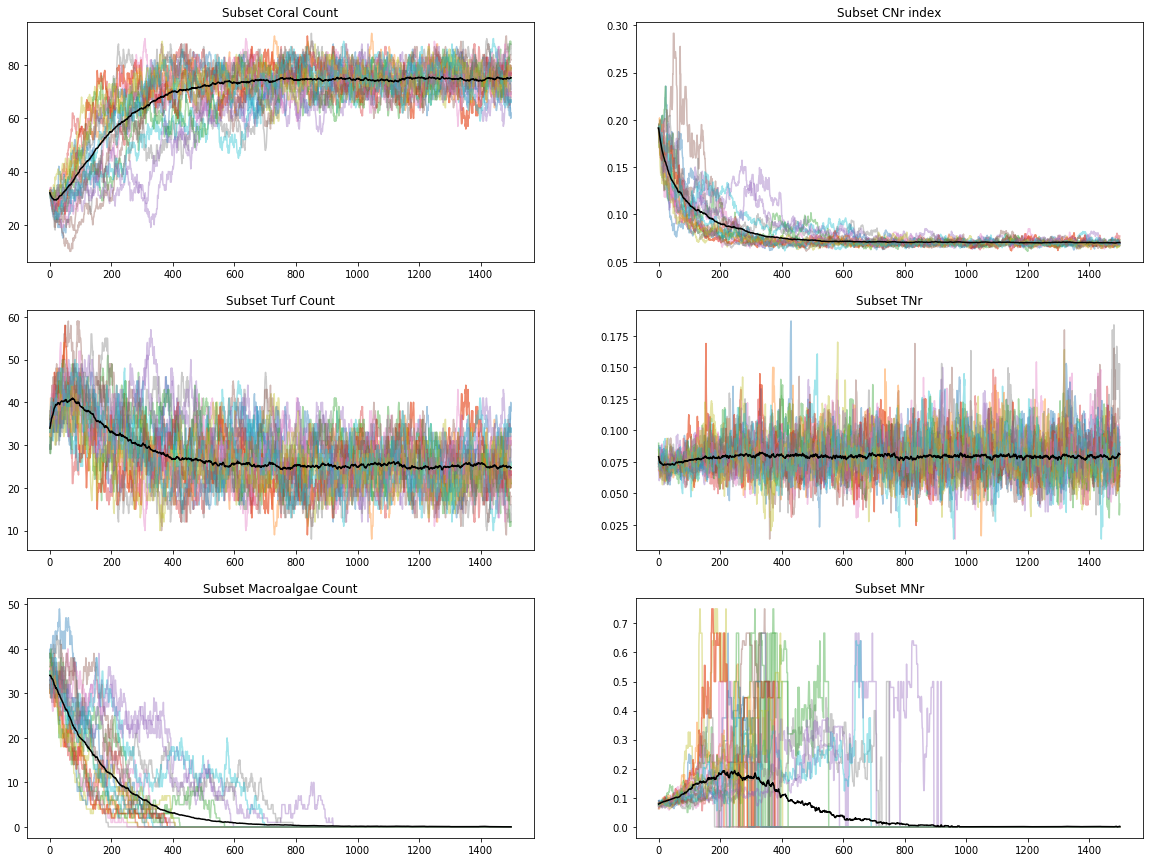

In [129]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)